In [1]:
import os
from keras.preprocessing import image

ModuleNotFoundError: No module named 'keras'

In [2]:
os.getcwd()

'C:\\Users\\DELL\\Machine Learning\\Support Vector Machines'

In [3]:
cd C:\\Users\\DELL\\Machine Learning\\Images

C:\Users\DELL\Machine Learning\Images


In [4]:
import numpy as np
from pathlib import Path

In [5]:
p=Path("../Images/")

In [6]:
dirs=p.glob("*")

labels_dict={"cat":0,"dog":1,"horse":2,"human":3}

labels=[]
image_data=[]

for folder_dirs in dirs:
    #print(folder_dirs)
    label=str(folder_dirs).split("\\")[-1][:-1]
    
    for img_path in folder_dirs.glob("*.jpg"):
        #print(img_path)
        img=image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [7]:
print(len(image_data))
print(len(labels))        

808
808


In [8]:
image_data=np.array(image_data,dtype="float32")/255.0
labels=np.array(labels)

In [9]:
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


In [12]:
def drawimage(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.show()
    return

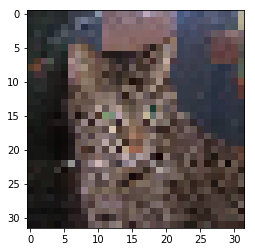

In [13]:
drawimage(image_data[0])

In [ ]:
for i in range(255,260):
    drawimage(image_data[i])

## Randomly shuffling of the data 

In [14]:
import random

In [15]:
## Zipping the data
combine=list(zip(image_data,labels))

## randomly shuffling the data 
random.shuffle(combine)

## Uunzipping the data again usingg *
image_data[:],labels[:]=zip(*combine)

In [16]:
print(type(image_data))

<class 'numpy.ndarray'>


In [17]:
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


In [18]:
print(labels[:5])

[3 3 2 2 2]


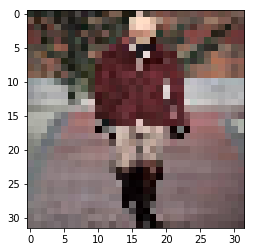

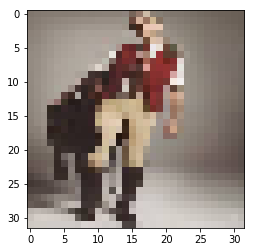

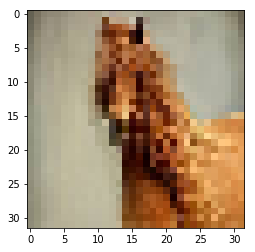

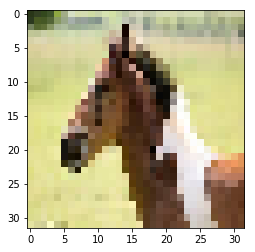

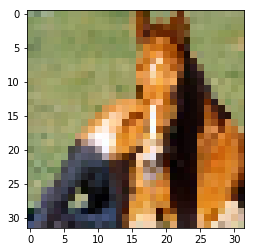

In [19]:
for i in range(5):
    drawimage(image_data[i])

In [20]:
M=image_data.shape[0]
image_data=image_data.reshape(M,-1)
print(image_data.shape)

(808, 3072)


In [21]:
classes=len(np.unique(labels))
print(classes)

4


In [22]:
def classwisedata(x,y):
    data={}
    
    for i in range(classes):
        data[i]=[]
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k]=np.array(data[k])
    
    return data

In [23]:
data=classwisedata(image_data,labels)

In [24]:
data.keys()

dict_keys([0, 1, 2, 3])

In [25]:
print(data[0].shape)
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

(202, 3072)
202
202
202


In [26]:
def getpairs(d1,d2):
    l1=d1.shape[0]
    l2=d2.shape[0]
    
    samples=l1+l2
    features=d1.shape[1]
    
    data_pairs=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    
    data_pairs[:l1,:]=d1
    data_pairs[l1:,:]=d2
    
    data_labels[:l1]=-1
    data_labels[l1:]=1
    
    return data_pairs,data_labels

In [27]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [28]:
mysvm=SVM()

In [ ]:
xp,yp=getpairs(data[0],data[1])

In [ ]:
print(xp.shape)

In [ ]:
wts,bias,loss=mysvm.fit(xp,yp,learning_rate=0.00001,maxItr=1000)

In [29]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(loss)
print("Loss at the end is %f"%loss[-1])

In [30]:
def trainsvm(x,y):
    svm_classifier={}
    for i in range(classes):
        svm_classifier[i]={}
        for j in range(i+1,classes):
            xpair,ypair=getpairs(data[i],data[j])
            wts,bias,loss=mysvm.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifier[i][j]=(wts,bias)
            
    return svm_classifier

In [31]:
svm_classifiers=trainsvm(image_data,labels)

In [32]:
print(svm_classifiers[0][1][0].shape)

(1, 3072)


In [33]:
def binarypredict(x,w,b):
    z=np.dot(w,x.T+b)
    if z>=0:
        return 1
    else :
        return -1
    

In [34]:
def predict(x):
    count=np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b=svm_classifiers[i][j]
            z=binarypredict(x,w,b)
            
            if z==1:
                count[j]+=1
            else:
                count[i]+=1
    print(count)
    return count

In [35]:
predict(image_data[0])

[1. 0. 3. 2.]


array([1., 0., 3., 2.])

In [50]:
def predict(x):
    
    count = np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binarypredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    
    return final_prediction

In [51]:
predict(image_data[2])

2

In [52]:
labels[2]

2

In [53]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        predicted=predict(x[i])
        if predicted==y[i]:
            count +=1
            
    return float(count/x.shape[0])

In [54]:
accuracy(image_data,labels)

0.5915841584158416